モンテカルロシミュレーションは、確率論に基づいて問題を数値的に解決する手法です。特に複雑な問題の解析において有用で、確率的なシナリオを何度もシミュレートし、最終的な結果を推定します。この手法は、金融工学を含む多くの分野で広く利用されています。

# モンテカルロシミュレーションの基礎

- ランダムサンプリング: モンテカルロシミュレーションは、ランダムなデータを多く生成し、その結果を基に計算を行います。これにより、理論的に求めるのが難しい解に対して近似解を得ることができます。

- シミュレーション: モデルやシステムを何度もシミュレーションし、結果の分布や期待値を求めます。シミュレーション回数が多ければ多いほど、精度は高くなります。

- 結果の集計: シミュレーションの結果を基に、期待値、分散、リスクなどを計算します。

# モンテカルロシミュレーションの手順
1. モデルの定義
2. 必要なパラメータ（確率分布など）の決定
3. ランダムサンプリングでシミュレーションを実行
4. 結果を集計して、期待値や確率分布を求める

# 金融工学でのモンテカルロシミュレーションの応用

金融工学では、モンテカルロシミュレーションがよく使われます。例えば、オプションの評価やポートフォリオのリスク管理において、モンテカルロシミュレーションを活用して価格の推定やリスクの分布を求めます。

# 例: オプション価格の計算

ブラック-ショールズモデルを用いて、オプションの価格をモンテカルロシミュレーションで推定する方法を見てみましょう。

In [1]:
import numpy as np

# パラメータの設定
S0 = 100      # 初期株価
K = 100       # 行使価格
T = 1         # 満期までの時間（年）
r = 0.05      # リスクフリーレート
sigma = 0.2   # ボラティリティ
N = 10000     # シミュレーションの回数

# シミュレーション
np.random.seed(0)
Z = np.random.normal(0, 1, N)  # 標準正規分布の乱数
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # 株価の最終価格

# オプションのペイオフ（コールオプションの場合）
payoff = np.maximum(ST - K, 0)

# オプション価格の計算
option_price = np.exp(-r * T) * np.mean(payoff)

print(f"オプション価格（モンテカルロシミュレーション）: {option_price:.2f}")


オプション価格（モンテカルロシミュレーション）: 10.08


--- 

# 金融工学での実践例
- オプションの価格付け: モンテカルロシミュレーションを使って、ブラック-ショールズモデルに基づくオプションの理論価格を推定することができます。
- リスク管理: 投資ポートフォリオのリスク（Value at Risk）をシミュレーションで評価します。
- 金利の予測: モンテカルロシミュレーションを使って、将来の金利や為替レートの確率分布を推定できます。

モンテカルロシミュレーションの理解が深まると、金融工学やリスク管理、ポートフォリオ最適化などの分野で非常に有用です。

ブラックショールズ方程式は次のように表されます：

$$
C = S_0 N(d_1) - K e^{-rT} N(d_2)
$$

ここで：
- $ C $ はコールオプションの価格
- $ S_0 $ は現在の株価
- $ K $ は行使価格
- $ T $ はオプションの満期までの期間（年単位）
- $ r $ はリスクフリーレート（通常、国債利回りなど）
- $ N(d_1) $ と $ N(d_2) $ は累積分布関数（CDF）であり、通常は標準正規分布を使用
- $ \sigma $ は株価のボラティリティ

ブラックショールズ方程式の $ d_1 $ と $ d_2 $ は次のように計算されます：

$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right) T}{\sigma \sqrt{T}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T}
$$


# 説明

1. 初期株価$S_0$、行使価格$K$、満期までの期間$T$、リスクフリーレート$r$、ボラティリティ$\sigma$のパラメータを設定します。

2. モンテカルロシミュレーションにより、未来の株価を生成します。これは、株価が対数正規分布に従うと仮定して、次の式を用いて計算します：

$
S_T = S_0 \cdot \exp\left( (r - \frac{\sigma^2}{2}) \cdot T + \sigma \cdot \sqrt{T} \cdot Z \right)
$

ここで：
- $S_T$ = 満期時の株価
- $S_0$ = 初期株価
- $r$ = リスクフリーレート
- $\sigma$ = ボラティリティ
- $T$ = 満期までの期間
- $Z$ = 標準正規分布からのランダムな値


3. 各シミュレーションでオプションのペイオフを計算します（コールオプションの場合、$\text{Payoff} = \max(S_T - K, 0)$

4. オプションの理論価格は、ペイオフの平均値をリスクフリーレートで割引くことで得られます。

これを実行すると、ブラック-ショールズモデルに基づいたオプションの価格を推定することができます。シミュレーション回数を増やすことで、価格推定の精度も高まります。

In [2]:
import numpy as np

# ブラック-ショールズのパラメータ
S0 = 100       # 初期株価
K = 100        # 行使価格
T = 1          # 満期までの期間（年）
r = 0.05       # リスクフリーレート
sigma = 0.2    # ボラティリティ
N = 10000      # シミュレーション回数

# モンテカルロシミュレーションでの株価シミュレーション
np.random.seed(0)
Z = np.random.normal(0, 1, N)  # 標準正規分布に従う乱数
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # シミュレーション後の株価

# コールオプションのペイオフ（最終株価が行使価格を上回った場合）
payoff = np.maximum(ST - K, 0)

# オプション価格の計算（割引現在価値を計算）
option_price = np.exp(-r * T) * np.mean(payoff)

print(f"ブラック-ショールズモデルに基づくオプション価格（モンテカルロシミュレーション）: {option_price:.2f}")


ブラック-ショールズモデルに基づくオプション価格（モンテカルロシミュレーション）: 10.08


# モンテカルロシミュレーションのリスク管理への利用

投資ポートフォリオのリスク評価における Value at Risk (VaR) は、**特定の信頼水準（例えば95％や99％）** で、一定期間内に発生する可能性のある最大損失を示す指標です。モンテカルロシミュレーションを用いてVaRを評価する方法を実装します。

### Value at Risk (VaR) の定義

VaRは、指定された信頼区間で、一定期間（例えば1日または1ヶ月）の間に発生する可能性のある最大損失を示します。例えば、99％の信頼水準で1日VaRを求める場合、1日以内にポートフォリオが99％の確率でこの金額を超える損失を出さないということです。

モンテカルロシミュレーションを用いたVaR評価
モンテカルロシミュレーションを使ってVaRを評価する手順は以下の通りです：

1. ポートフォリオのリターン分布をシミュレート。
2. リターンを基にポートフォリオ価値のシミュレーションを行う。
3. シミュレーション結果から損失を計算。
4. 損失の分布から指定された信頼区間に対応する最大損失をVaRとして求める。

ポートフォリオの1日99% VaR: -910872.41


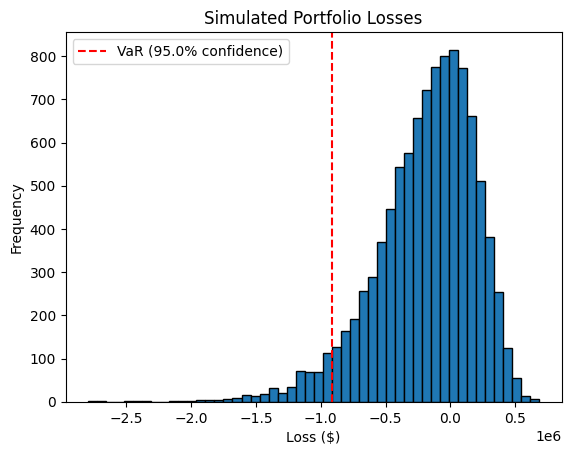

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ポートフォリオのパラメータ
initial_value = 1000000  # ポートフォリオの初期価値（1,000,000）
mean_return = 0.0005     # 日次リターンの平均（0.05%）
volatility = 0.02        # 日次リターンのボラティリティ（2%）
days = 252               # 1年の日数
simulations = 10000      # シミュレーション回数
confidence_level = 0.99  # 信頼区間（99%）

# モンテカルロシミュレーションでリターンを生成
# np.random.seed(42)
daily_returns = np.random.normal(mean_return, volatility, (simulations, days)) # 正規分布に従うリターンの乱数です。 

# ポートフォリオ価値を計算（累積リターン）
portfolio_values = initial_value * np.exp(np.cumsum(daily_returns, axis=1))

# 各シミュレーションでの損失を計算
final_values = portfolio_values[:, -1]  # 最終日のポートフォリオ価値
losses = initial_value - final_values  # 損失（最終価値との差）

# VaRを計算（損失の分布から信頼水準に対応する値を取得）
VaR = np.percentile(losses, (1 - confidence_level) * 100)

# 結果の表示
print(f"ポートフォリオの1日99% VaR: {VaR:.2f}")

# 損失のヒストグラムをプロット
plt.hist(losses, bins=50, edgecolor='black')
plt.axvline(VaR, color='r', linestyle='--', label=f'VaR ({confidence_level*100}% confidence)')
plt.title('Simulated Portfolio Losses')
plt.xlabel('Loss ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


このコードを実行すると、99%の信頼区間での1日VaRが計算され、その損失の分布もヒストグラムで表示されます。これにより、指定した信頼水準における最大損失の目安を得ることができます。

# 金利の予測

モンテカルロシミュレーションを使用して将来の金利や為替レートの確率分布を推定するために、まず金利や為替レートのモデルを定義し、そのモデルに基づいてシミュレーションを行います。代表的なモデルとして、Geometric Brownian Motion (GBM) や Ornstein-Uhlenbeck process (O-U プロセス) がよく使われます。

ここでは、簡単に実装できる Geometric Brownian Motion (GBM) を使って、将来の金利や為替レートをシミュレーションし、その確率分布を推定します。

# 金利・為替レートの予測: モンテカルロシミュレーションを使用

モンテカルロシミュレーションを使って、将来の金利や為替レートの確率分布を推定します。ここでは、**Geometric Brownian Motion (GBM)** モデルを使って、金利や為替レートのシミュレーションを行います。

### GBMモデルの数式

GBMは次の確率微分方程式で表されます:

$
dS_t = \mu S_t dt + \sigma S_t dW_t
$

ここで:
- $ S_t $: 時点 $ t $ における価格（金利や為替レート）
- $ \mu $: ドリフト項（平均リターンや期待される金利変動）
- $ \sigma $: ボラティリティ（価格の変動度合い）
- $ W_t $: 標準ブラウン運動（ランダムウォーク）

シミュレーションでは、この式を離散化して次の式で表します:

$
S_{t+1} = S_t \exp\left( \left(\mu - \frac{\sigma^2}{2}\right) \Delta t + \sigma \sqrt{\Delta t} Z_t \right)
$

ここで:
- $ S_{t+1} $: 次の時点での金利や為替レート
- $ \Delta t $: 時間間隔（通常1日や1ヶ月）
- $ Z_t $: 標準正規分布からの乱数

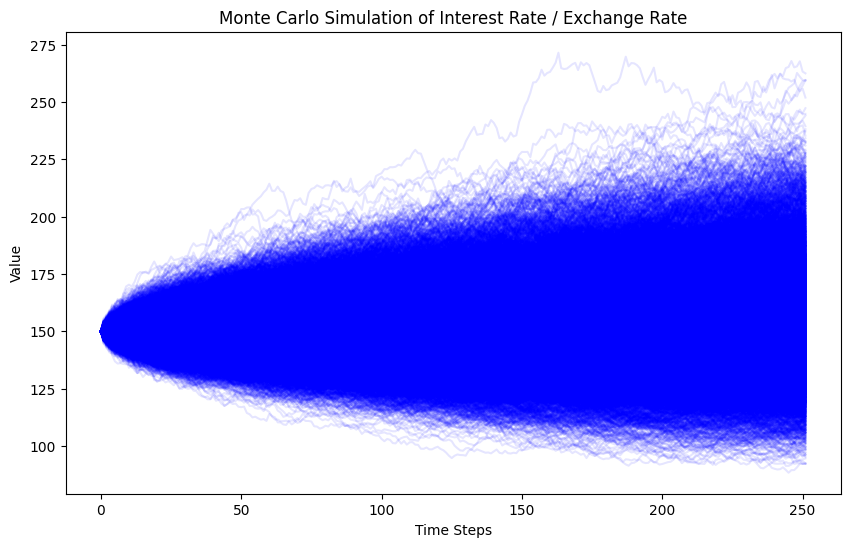

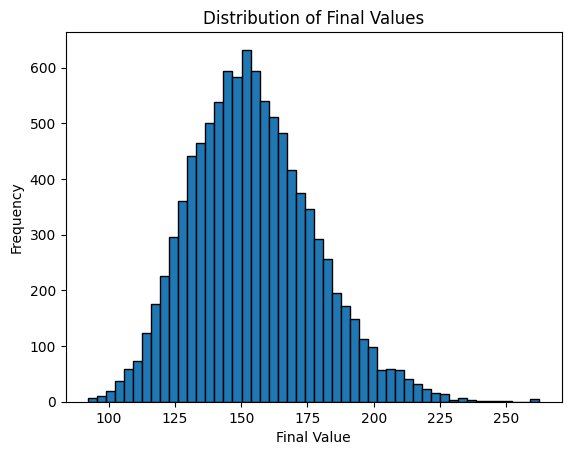

最終値の平均: 154.37
最終値の標準偏差: 23.17


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# モデルのパラメータ設定
initial_value = 150  # 初期値（例えば金利や為替レートの現在値）
mu = 0.03           # 金利や為替レートのドリフト項、つまり期待される平均リターン（ここでは年率3%）。
sigma = 0.15        # ボラティリティ、すなわち金利や為替レートの変動度合い（ここでは年率15%）
T = 1               # シミュレーション期間（1年）
dt = 1/252          # 1日ごとの間隔（252営業日を想定）
simulations = 10000 # シミュレーション回数
steps = int(T / dt) # ステップ数

# モンテカルロシミュレーション
np.random.seed(42)  # 再現性を確保
paths = np.zeros((simulations, steps))
paths[:, 0] = initial_value # paths という配列にシミュレーション結果を格納します。

for t in range(1, steps):
    Z = np.random.normal(0, 1, simulations)  # 標準正規分布からの乱数:各ステップで、標準正規分布から乱数を生成し、その乱数に基づいて次の金利や為替レートを計算します。
    paths[:, t] = paths[:, t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(paths.T, color='blue', alpha=0.1)  # 各シミュレーションの結果
plt.title('Monte Carlo Simulation of Interest Rate / Exchange Rate')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()

# 確率分布の推定
final_values = paths[:, -1]  # 最後の時点での値（1年後の金利や為替レート）
plt.hist(final_values, bins=50, edgecolor='black')
plt.title('Distribution of Final Values')
plt.xlabel('Final Value')
plt.ylabel('Frequency')
plt.show()

# 最終値の統計量を表示
mean_final_value = np.mean(final_values)
std_final_value = np.std(final_values)
print(f"最終値の平均: {mean_final_value:.2f}")
print(f"最終値の標準偏差: {std_final_value:.2f}")


この実装では、モンテカルロシミュレーションを使用して将来の金利や為替レートの確率分布を推定しています。シミュレーション結果は複数のパス（シミュレーション経路）を描画し、最終的な金利や為替レートの確率分布をヒストグラムとして表示します。この方法を使うことで、未来の価格変動に対するリスクの分析や予測が可能になります。

- 最終値の平均
  - 意味: シミュレーションで得られた最終的な金利や為替レートの平均値です。この値は、将来の金利や為替レートの「中心」または最も予測される値を表します。
  - 意義: 値は、シミュレーションの結果として「1年後に金利や為替レートが最もあり得る平均的な水準」を示します。この数字は、金融市場でよく使われる「期待値」に該当します。例えば、投資家はこれを基準に将来の市場動向を予測し、ポートフォリオ戦略を立てることができます。

- 最終値の標準偏差
  - 意味: 最終値の標準偏差は、シミュレーション結果の「ばらつき」や「リスクの大きさ」を示します。標準偏差が大きいほど、金利や為替レートの将来の動きが大きく不確実であることを意味します。
  - 意義:値は、金利や為替レートが平均値からどれくらい離れる可能性があるかを示します。例えば、1年後に金利や為替レートが±23.50の範囲に収まる確率が高いということです。この情報は、リスク管理のために重要です。リスクを取るか、リスクを避けるかの判断に役立ちます。

- **リスク評価と意思決定に役立つ**
  - リスク管理: 標準偏差が大きい場合、金利や為替レートが不確実であり、リスクが高いことを意味します。投資家や企業は、リスクを低減させるためにヘッジを検討したり、リスクが高い投資を避ける戦略を取るかもしれません。
  - 意思決定: 最終的な平均と標準偏差は、投資家がリスクとリターンのバランスを取るための指標になります。平均が高ければ利益が期待できる一方で、標準偏差が大きいとそのリターンの実現可能性に不確実性が伴います。この情報をもとに、リスク許容度に応じた戦略を立てることができます。